# NFL Arrests

* Arrest average per team. - Issac
* Time start vs. number of arrests. - Issac
* Week number vs. number of arrests - Mike
* Home team vs away team - Eric
* division game vs non division game - Eric
* Blowout vs. close game (Overtime is always close game) - Mike

####  Little more challenging
* Team made playoffs vs Teams that missed playoffs - Need external dataset.
* Team average vs number of arrests - Mike
* Avg win/loss by timeframe - Issac

# Important Notes:
### Teams Missing
* St. Louis
* Cleveland
* Buffalo
* Atlanta
* New Orleans
* Minnesota

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
nfl_arrests = pd.read_csv('ArrestSet.csv')

In [6]:
nfl_arrests

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,NaN,5.0,n
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,NaN,6.0,n
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,NaN,9.0,n
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,OT,6.0,y
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,OT,3.0,n
5,2011,14,Sunday,2:05:00 PM,Arizona,San Francisco,21,19,NaN,4.0,y
6,2011,15,Sunday,2:15:00 PM,Arizona,Cleveland,20,17,OT,1.0,n
7,2011,17,Sunday,2:15:00 PM,Arizona,Seattle,23,20,OT,4.0,y
8,2012,1,Sunday,1:25:00 PM,Arizona,Seattle,20,16,NaN,0.0,y
9,2012,3,Sunday,1:05:00 PM,Arizona,Philadelphia,27,6,NaN,12.0,n


In [7]:
nfl_arrests[nfl_arrests['arrests'] > 50]

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
739,2012,11,Sunday,8:20:00 PM,Pittsburgh,Baltimore,10,13,NaN,52.0,y
744,2013,3,Sunday,8:30:00 PM,Pittsburgh,Chicago,23,40,NaN,56.0,n
771,2011,10,Thursday,5:20:00 PM,San Diego,Oakland,17,24,NaN,69.0,y
782,2012,17,Sunday,1:25:00 PM,San Diego,Oakland,24,21,NaN,60.0,y


In [8]:
# Find out which teams did not provide arrest information

home_list = nfl_arrests.home_team.unique()
away_list = nfl_arrests.away_team.unique()

no_home = []
for team in away_list:
    if team not in home_list:
        no_home.append(team)

no_home

['St. Louis', 'Cleveland', 'Buffalo', 'Atlanta', 'New Orleans', 'Minnesota']

In [9]:
nfl_arrests.groupby('season').mean()

,week_num,home_score,away_score,arrests
season,,,,
2011,9.095477,23.668342,20.251256,6.214660
2012,9.140000,23.420000,21.370000,7.020833
2013,9.179612,24.859223,21.509709,6.500000
2014,9.039216,24.240196,20.906863,6.750000
2015,9.126904,23.441624,21.532995,6.338624


## Is there Coorelation with the Week Number

In [10]:
byWeek = nfl_arrests.groupby('week_num')
byWeek_mean = byWeek.mean()['arrests']
byWeek_median = byWeek.median()['arrests']
byWeek_sem = byWeek.sem()['arrests']

byWeek_summary = pd.DataFrame([byWeek_mean, byWeek_sem, byWeek_median])
byWeek_summary.reset_index(inplace=True)
byWeek_summary.drop(columns='index', inplace=True)

byWeek_summary.rename(index={0:'Mean', 1:'Standard Error', 2:'Median'}, inplace=True)
byWeek_summary

week_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Mean,6.816667,6.786885,7.568966,5.622642,6.232143,6.886792,6.716981,5.244898,7.500000,7.357143,5.730769,7.448276,6.792453,6.147059,6.385965,6.384615,5.866667
Standard Error,1.248387,1.032032,1.552492,1.118270,1.058973,1.359710,1.127689,1.039824,1.306263,1.671656,1.361260,1.513235,1.297356,1.124838,1.145372,1.152483,1.231981
Median,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000


In [11]:
# count number of weeks
week_count = len(byWeek_summary.columns)

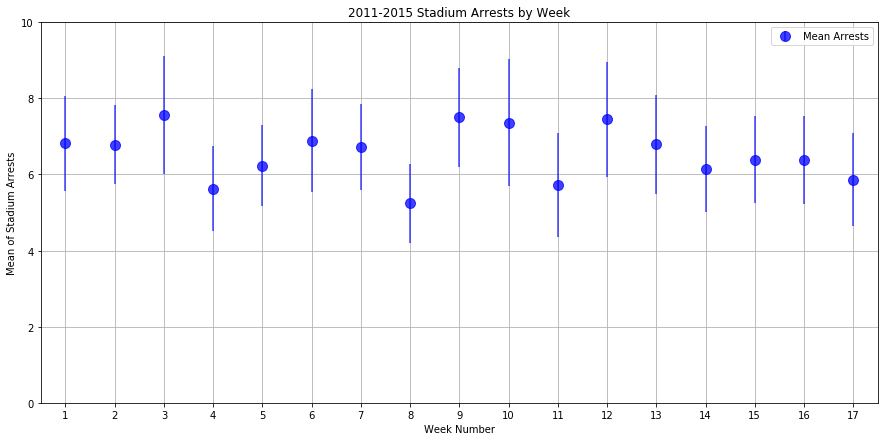

In [20]:
# Plot sample means with error bars
fig, ax = plt.subplots(figsize=(15,7))

ax.errorbar(np.arange(1, week_count + 1), byWeek_mean, yerr=byWeek_sem, fmt="o", color="b",
            markersize=10, alpha=0.75, label="Mean Arrests")

ax.set_xlim(0.5, week_count + .5)
ax.set_ylim(0,10)

ax.set_xlabel("Week Number")
ax.set_ylabel("Mean of Stadium Arrests")
ax.set_title("2011-2015 Stadium Arrests by Week")
ax.set_xticks(np.arange(1, week_count + 1))

plt.legend(loc="best", fontsize="medium", fancybox=True)
plt.grid()

plt.show()

## byWeek Comments:
This data set does not really show anything exciting, but well worth investigating.
* The middle of the season generally have the highest arrests (exception are week 7 and week 10). 
    ~ is it possible the highest offending teams had a bye during that week.

## Add a season Parameter into the mix:
Make a subplot of all the seasons by week

In [64]:
# Create a new dataframe that shows season by week arrest average.

season_group = nfl_arrests.groupby(['season', 'week_num'])

season_mean_arrests = season_group.mean()['arrests'].unstack(level=0)
season_sem_arrests = season_group.sem()['arrests'].unstack(level=0)

season_mean_arrests


season,2011,2012,2013,2014,2015
week_num,,,,,
1,5.846154,8.454545,10.272727,2.846154,7.500000
2,6.800000,7.076923,5.357143,8.692308,6.000000
3,6.181818,8.666667,8.307692,7.800000,6.750000
4,4.642857,4.500000,8.750000,7.363636,3.700000
5,5.111111,6.090909,4.181818,8.538462,6.583333
6,8.272727,6.454545,4.666667,6.600000,9.000000
7,6.285714,5.100000,7.461538,6.750000,7.545455
8,3.909091,6.200000,5.125000,6.000000,4.875000
9,8.250000,9.090909,4.900000,7.363636,7.600000


In [63]:
# Test functions to make an array of all 17 weeks for plotting.

len(season_sem_arrests)

np.full((1,17), season_mean_arrests[2011].max())
np.arange(1, len(season_mean_arrests)+1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

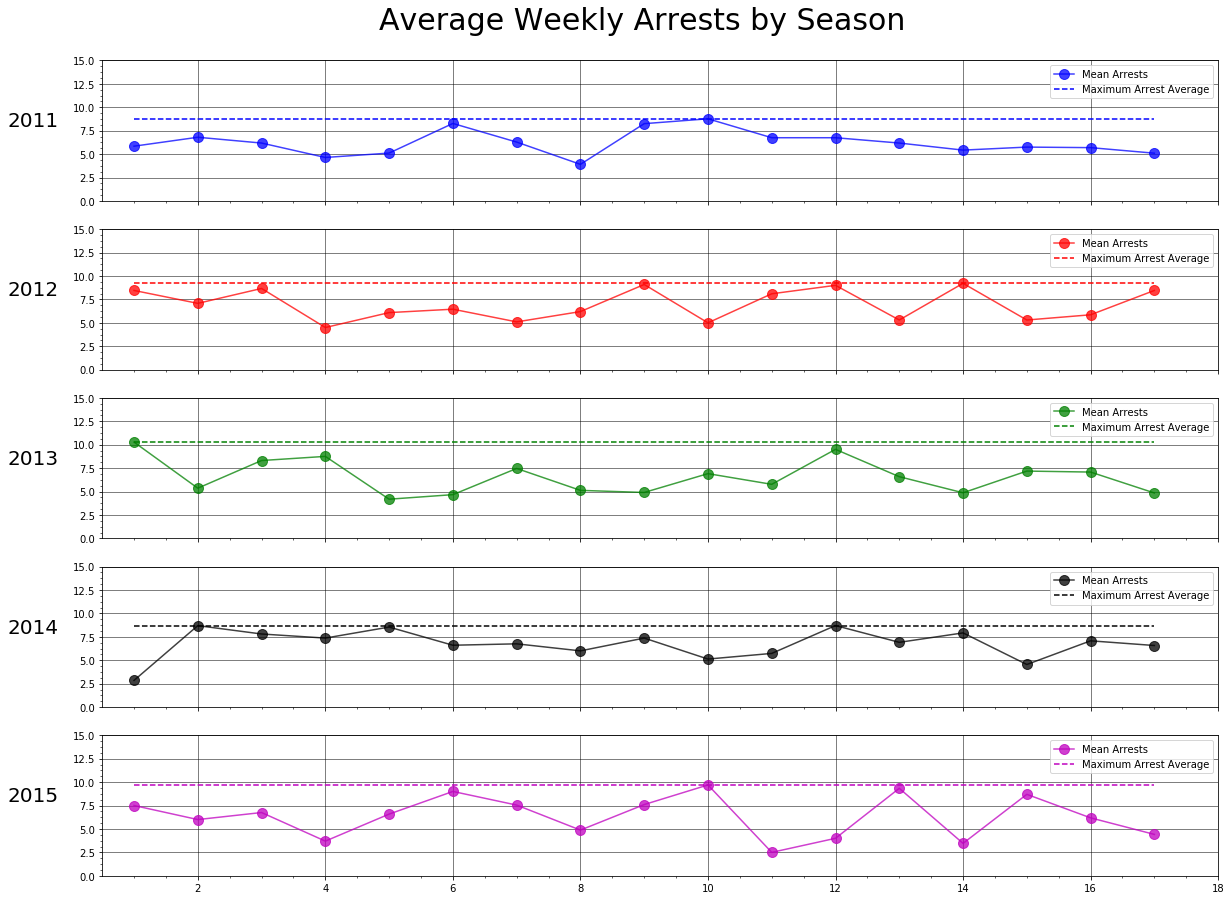

In [60]:
# Make a subplot 5 rows of plots... 
# Share the same x-axis and y_lims are the same for each

fig, axes = plt.subplots(nrows=5, ncols=1, sharex=True, figsize=(20, 15))

colors = ['b', 'r', 'g', 'k', 'm']

for row_plot in range(0,len(axes)):
    
    # current year to plot
    year = 2011 + row_plot
    
    # weeks in season
    weeks = np.arange(1, len(season_mean_arrests)+1)
    
    # plot of errorbar
    axes[row_plot].plot(weeks, season_mean_arrests[year],
                            marker='o', markersize=10, color=colors[row_plot],
                            alpha=0.75, label="Mean Arrests")
    
    # max line plot
    max_line = np.full((17,1), season_mean_arrests[year].max())
    axes[row_plot].plot(weeks,max_line, linewidth=1.5, linestyle='--',
                        label="Maximum Arrest Average", color=colors[row_plot], alpha=1)

    # set axes limits
    axes[row_plot].set_xlim(0.5, len(season_mean_arrests)+1)
    axes[row_plot].set_ylim(0,15)

    # Set ylabel
    axes[row_plot].set_ylabel(year, rotation=0, fontsize=20, labelpad=40)

    # set grid parameters

    axes[row_plot].minorticks_on()
    
    axes[row_plot].grid(which='major', linestyle='-', linewidth='0.5', color='black')
    
    axes[row_plot].legend()
    
fig.suptitle('Average Weekly Arrests by Season', fontsize=30, y=.93)

plt.show()

# Is there any noticable patterns in the seasonal occurances?

Make a box pot of the average number of arrests by season. This will transition into specific team analysis.

In [65]:
nfl_arrests.head()

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
0,2011,1,Sunday,1:15:00 PM,Arizona,Carolina,28,21,NaN,5.0,n
1,2011,4,Sunday,1:05:00 PM,Arizona,New York Giants,27,31,NaN,6.0,n
2,2011,7,Sunday,1:05:00 PM,Arizona,Pittsburgh,20,32,NaN,9.0,n
3,2011,9,Sunday,2:15:00 PM,Arizona,St. Louis,19,13,OT,6.0,y
4,2011,13,Sunday,2:15:00 PM,Arizona,Dallas,19,13,OT,3.0,n


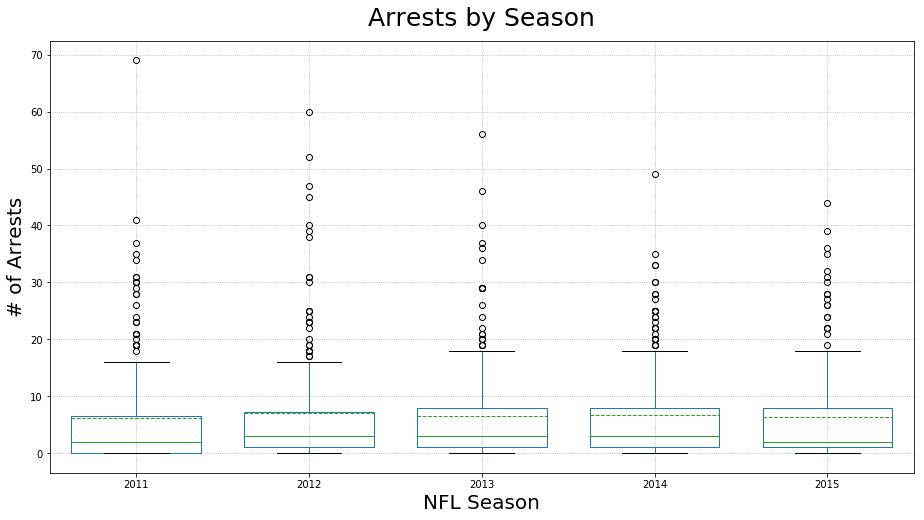

In [96]:
# Create a simple boxplot of the seasonal arrest averages

fig, ax = plt.subplots(figsize=(15,8))

nfl_arrests.boxplot(column='arrests',by='season', ax=ax, widths=.75, showmeans=True, meanline=True)

ax.set_xlabel('NFL Season', fontsize=20)
ax.set_ylabel('# of Arrests', fontsize=20)
ax.set_title('Arrests by Season', fontsize=25, pad=15)

plt.suptitle("")

plt.grid(linestyle=':')
plt.show()


## bySeason Comments: 

In all seasons, there are a significant number of outliers above the maximum. This means:
* The average number of arrests per season is higher than the median number of arrests.
    - In some seasons, the average is almost at the third Quartile of the dataset. (ex. 2012)
* If the Median arrests is normally below 5, A good portion of the season is relatively tame.

## Is there any trends in the Outliers?

According to the boxplot, there is a significant number of games outside the predicted region. Hence, we should look at these outliers to gather intel on certain teams.

In [97]:
# Find the outliers according to the boxplot for season total and find how many times an outliers over a season occured.

# outliers are 3xIQR
# Suspected outliers are 1.5xIQR

Q1 = nfl_arrests['arrests'].quantile(0.25)
Q3 = nfl_arrests['arrests'].quantile(0.75)
IQR = Q3 - Q1
IQR

7.0

In [169]:
# Since there are no outliers below the median, we only need to analyze the maximum. 

majorOutliers = nfl_arrests.loc[nfl_arrests['arrests'] > (3*IQR) + Q3]
# suspectedOutliers = nfl_arrests.loc[nfl_arrests['arrests'] >= (1.5*IQR) + Q3]

#left suspected outliers out because there 114 instances which fell into suspected outlier category

majorOutliers

,season,week_num,day_of_week,gametime_local,home_team,away_team,home_score,away_score,OT_flag,arrests,division_game
575,2011,13,Sunday,4:15:00 PM,New York Giants,Green Bay,35,38,NaN,35.0,n
576,2011,15,Sunday,1:00:00 PM,New York Giants,Washington,10,23,NaN,31.0,y
578,2012,1,Wednesday,8:20:00 PM,New York Giants,Dallas,17,24,NaN,39.0,y
591,2013,12,Sunday,4:25:00 PM,New York Giants,Dallas,21,24,NaN,46.0,y
599,2014,12,Sunday,8:30:00 PM,New York Giants,Dallas,28,31,NaN,33.0,y
605,2015,7,Sunday,4:25:00 PM,New York Giants,Dallas,27,20,NaN,35.0,y
607,2015,13,Sunday,1:00:00 PM,New York Giants,New York Jets,20,23,OT,39.0,n
608,2015,15,Sunday,1:00:00 PM,New York Giants,Carolina,35,38,NaN,31.0,n
610,2011,1,Sunday,8:20:00 PM,New York Jets,Dallas,27,24,NaN,34.0,n
614,2011,10,Sunday,8:20:00 PM,New York Jets,New England,16,37,NaN,30.0,y


In [170]:
# Create a group for major outliers by team
byHome_outliers = majorOutliers.groupby('home_team')

# Sort the group by number of occurances
home_count = byHome_outliers['arrests'].count()
home_count.sort_values(ascending=False, inplace=True)
home_count

home_team
San Diego          13
New York Giants     8
New York Jets       7
Pittsburgh          6
San Francisco       3
Oakland             2
Name: arrests, dtype: int64

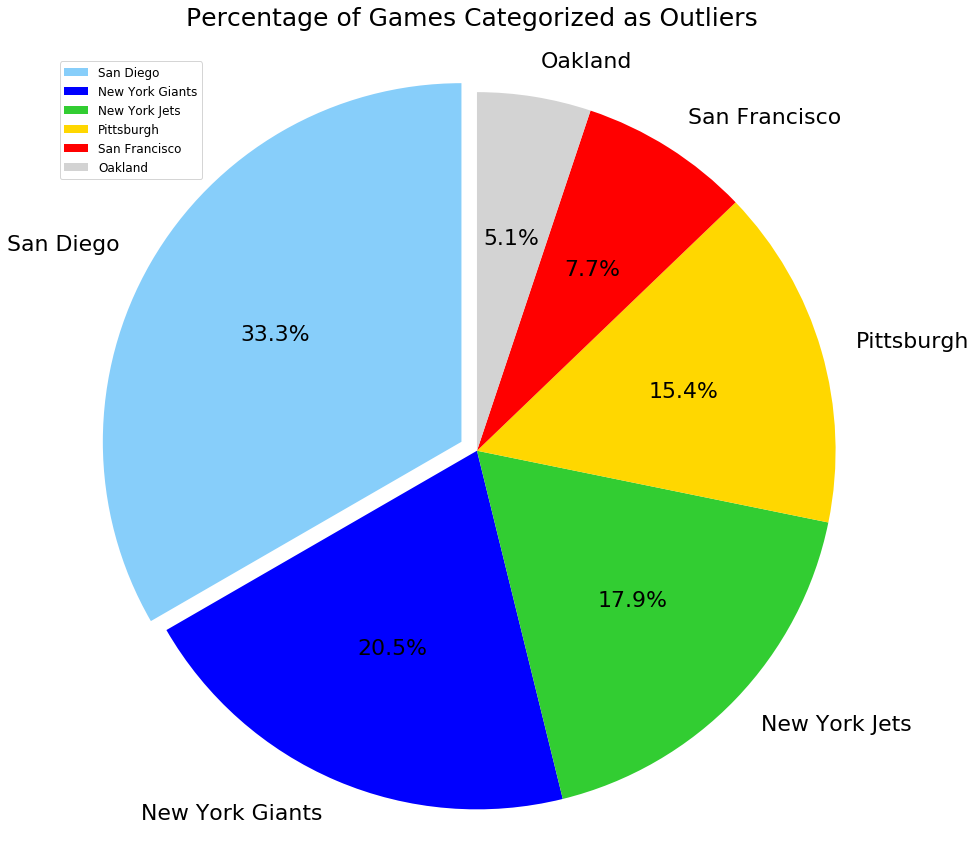

In [190]:
# Make a pie chart showcasing the major outliers:

# Define explodes and colors in pie chart
explode = (0.05, 0, 0, 0, 0, 0)
colors = ['lightskyblue', 'blue', 'limegreen', 'gold', 'red', 'lightgray']

# plot chart
fig, ax = plt.subplots(figsize=(12,12))

home_count.plot(kind='pie', colors=colors, ax=ax, explode=explode,
                autopct='%1.1f%%', startangle=90, shadow=False, legend=True, fontsize=22)



# remove default ylabel and set title
ax.set_ylabel('')
ax.set_title('Percentage of Games Categorized as Outliers', fontsize='25', pad=30)

ax.legend(loc=2, fontsize=12, fancybox=True)
ax.axis('equal')

plt.tight_layout()
plt.show()